In [2]:
import pandas as pd

In [3]:
titanictrain=pd.read_csv('titanic/train.csv')
titanictest=pd.read_csv('titanic/test.csv')

In [4]:
titanictrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanictest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

These will require correcting.

* Cabin - Age - Embarked features contain a number of null values in that order for the training dataset.
* Cabin - Age are incomplete in case of test dataset.

In [6]:
titanictrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# Store our passenger ID for easy access
PassengerId = titanictest['PassengerId']

In [8]:
titanictrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


What is the distribution of numerical feature values across the samples?

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* Survived is a categorical feature with 0 or 1 values.
* Around 38% samples survived representative of the actual survival rate at 32%.
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.

In [10]:
titanictrain.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Herman, Miss. Alice",male,CA. 2343,G6,S
freq,1,577,7,4,644


What is the distribution of categorical features?

* Names are unique across the dataset (count=unique=891)
* Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S)
* Ticket feature has high ratio (22%) of duplicate values (unique=681).

Assumtions based on data analysis
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Correlating**.

* We want to know how well does each feature correlate with Survival. 
* We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

**Completing**.

* We may want to complete Age feature as it is definitely correlated to survival.
* We may want to complete the Embarked feature as it may also correlate with survival or another important feature.

**Correcting**.

* Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
* Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
* PassengerId may be dropped from training dataset as it does not contribute to survival.
* Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.

**Creating**.

* We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
* We may want to engineer the Name feature to extract Title as a new feature.
* We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
* We may also want to create a Fare range feature if it helps our analysis.

**Classifying**.

* We may also add to our assumptions based on the problem description noted earlier.

* Women (Sex=female) were more likely to have survived.
* Children (Age<?) were more likely to have survived.
* The upper-class passengers (Pclass=1) were more likely to have survived.

In [11]:
titanictrain[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
titanictrain[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
titanictrain[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
titanictrain[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Analyze by pivoting features**
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

* **Pclass** We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
* **Sex** We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
* **SibSp and Parch** These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1)

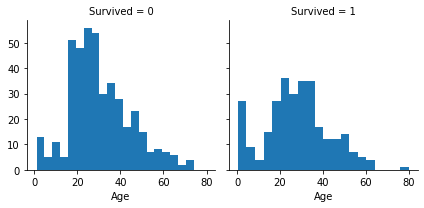

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


g = sns.FacetGrid(titanictrain, col='Survived')
g.map(plt.hist, 'Age', bins=20)

**Analyze by visualizing data**
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

**Correlating numerical features**

Let us start by understanding correlations between numerical features and our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

**Observations**.

* Infants (Age <=4) had high survival rate.
* Oldest passengers (Age = 80) survived.
* Large number of 15-25 year olds did not survive.
* Most passengers are in 15-35 age range.

**Decisions**.

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

* We should consider Age (our assumption classifying #2) in our model training.
* Complete the Age feature for null values (completing #1).
* We should band age groups (creating #3).

/usr/lib/python3/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


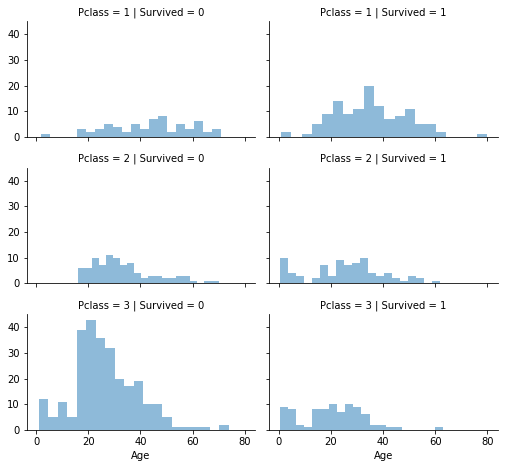

In [16]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(titanictrain, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Correlating numerical and ordinal features**
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

**Observations**.

* Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
* Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
* Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
* Pclass varies in terms of Age distribution of passengers.

**Decisions**.

* Consider Pclass for model training.

/usr/lib/python3/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/lib/python3/dist-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/lib/python3/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


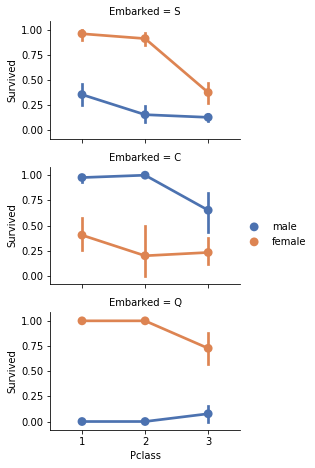

In [17]:
# grid = sns.FacetGrid(titanictrain, col='Embarked')
grid = sns.FacetGrid(titanictrain, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Correlating categorical features**
Now we can correlate categorical features with our solution goal.

**Observations**.

* Female passengers had much better survival rate than males. Confirms classifying (#1).
* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

**Decisions**.

* Add Sex feature to model training.
* Complete and add Embarked feature to model training.


/usr/lib/python3/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


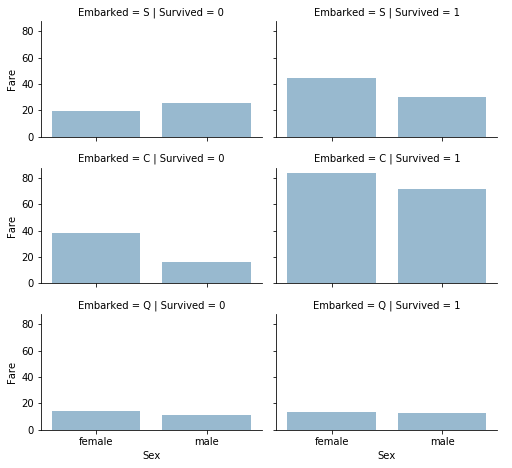

In [18]:
# grid = sns.FacetGrid(titanictrain, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(titanictrain, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

**Correlating categorical and numerical features**
We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

**Observations**.

Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

**Decisions**.

Consider banding Fare feature.

**Feature Engineering**

Here, credit must be extended to Sina's very comprehensive and well-thought out notebook for the feature engineering ideas so please check out his work

https://www.kaggle.com/sinakhorami/titanic-best-working-classifier : by Sina

In [20]:
import re
import numpy as np

full_data = [titanictrain, titanictest]

# Feature that tells whether a passenger had a cabin on the Titanic
titanictrain['Has_Cabin'] = titanictrain["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
titanictest['Has_Cabin'] = titanictest["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
# Feature engineering steps taken from Sina
# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
# Remove all NULLS in the Embarked column
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])
# Remove all NULLS in the Fare column and create a new feature CategoricalFare
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(titanictrain['Fare'].median())
titanictrain['CategoricalFare'] = pd.qcut(titanictrain['Fare'], 4)
# Create a New feature CategoricalAge
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
titanictrain['CategoricalAge'] = pd.cut(titanictrain['Age'], 5)
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
     # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 ;

In [22]:
#Adding a new feature Age*pclass.
for dataset in full_data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [23]:
# Feature selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
titanictrain = titanictrain.drop(drop_elements, axis = 1)
titanictrain = titanictrain.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)
titanictest  = titanictest.drop(drop_elements, axis = 1)

Okay, now we have the data ready, we've extracted relevan info's and dropped the categorical columns, all our features are now numeric, a format suitable for machine learning models. 

In [25]:
#profile report
import pandas_profiling
titanictrain.profile_report()

There are not too many features strongly correlated with one another. This is good from the point of view of feeding the data to a ML model as this means there isn't nuch redundant data in our training set. 
Note : There are some highly correlated features like family size and Parch or isalone and family size but I'll still keep these features for the purpose of this exercise. 


Classifier comparison


In [26]:
titanictrain = titanictrain.values
titanictest  = titanictest.values

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = titanictrain[0::, 1::]
y = titanictrain[0::, 0]

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]

In [28]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(solver = 'saga', random_state = 0,C=100)
logit_model.fit(X_train, y_train)

y_logit_pred = logit_model.predict(X_test)

from sklearn import metrics
count_misclassified = (y_test != y_logit_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_logit_pred)
print('Accuracy: {:.2f}'.format(accuracy))
precision = metrics.precision_score(y_test, y_logit_pred, average= 'macro')
print('Precision: {:.2f}'.format(precision))
recall = metrics.recall_score(y_test, y_logit_pred, average= 'macro')
print('Recall: {:.2f}'.format(recall))
f1_score = metrics.f1_score(y_test, y_logit_pred, average = 'macro')
print('F1 score: {:.2f}'.format(f1_score))

Misclassified samples: 17
Accuracy: 0.81
Precision: 0.80
Recall: 0.79
F1 score: 0.80


In [29]:
#Support Vector Classifier with Linear

from sklearn.svm import SVC
svc_linear_model = SVC(kernel='linear', C=0.01, gamma= 'scale', decision_function_shape='ovo', random_state = 42)

svc_linear_model.fit(X_train, y_train)
y_svc_linear_pred = svc_linear_model.predict(X_test)

from sklearn import metrics
count_misclassified = (y_test != y_svc_linear_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_svc_linear_pred)
print('Accuracy: {:.2f}'.format(accuracy))
precision = metrics.precision_score(y_test, y_svc_linear_pred, average= 'macro')
print('Precision: {:.2f}'.format(precision))
recall = metrics.recall_score(y_test, y_svc_linear_pred, average= 'macro')
print('Recall: {:.2f}'.format(recall))
f1_score = metrics.f1_score(y_test, y_svc_linear_pred, average = 'macro')
print('F1 score: {:.2f}'.format(f1_score))

Misclassified samples: 12
Accuracy: 0.87
Precision: 0.86
Recall: 0.85
F1 score: 0.86


In [30]:
#Support Vector Classifier with Polynomial

from sklearn.svm import SVC
svc_ply_model = SVC(kernel='poly', C=100, gamma= 'scale', decision_function_shape='ovo', random_state = 42)

svc_ply_model.fit(X_train, y_train)
y_svc_ply_pred = svc_ply_model.predict(X_test)

from sklearn import metrics
count_misclassified = (y_test != y_svc_linear_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_svc_linear_pred)
print('Accuracy: {:.2f}'.format(accuracy))
precision = metrics.precision_score(y_test, y_svc_linear_pred, average= 'macro')
print('Precision: {:.2f}'.format(precision))
recall = metrics.recall_score(y_test, y_svc_linear_pred, average= 'macro')
print('Recall: {:.2f}'.format(recall))
f1_score = metrics.f1_score(y_test, y_svc_linear_pred, average = 'macro')
print('F1 score: {:.2f}'.format(f1_score))

Misclassified samples: 12
Accuracy: 0.87
Precision: 0.86
Recall: 0.85
F1 score: 0.86


In [31]:
#Support Vector Classifier with RBF

from sklearn.svm import SVC
svc_rbf_model = SVC(kernel='rbf', C=10, gamma= 'scale', decision_function_shape='ovo', random_state = 42)

svc_rbf_model.fit(X_train, y_train)
y_svc_rbf_pred = svc_rbf_model.predict(X_test)

from sklearn import metrics
count_misclassified = (y_test != y_svc_linear_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_svc_linear_pred)
print('Accuracy: {:.2f}'.format(accuracy))
precision = metrics.precision_score(y_test, y_svc_linear_pred, average= 'macro')
print('Precision: {:.2f}'.format(precision))
recall = metrics.recall_score(y_test, y_svc_linear_pred, average= 'macro')
print('Recall: {:.2f}'.format(recall))
f1_score = metrics.f1_score(y_test, y_svc_linear_pred, average = 'macro')
print('F1 score: {:.2f}'.format(f1_score))

Misclassified samples: 12
Accuracy: 0.87
Precision: 0.86
Recall: 0.85
F1 score: 0.86


In [32]:
#Ensemble Models
#Random Forest Classifier with Hyper Parameter tuning

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    "criterion" : ["gini", "entropy"],
    'bootstrap': [True],
    'max_depth': [1,16,32,64,128],#list(range(90,100)),
    'max_features': ['auto'],
    'min_samples_leaf': [1,5,10,15,20,25,50],
    'min_samples_split': [2,4,8,10,12,16,20,25,35],
    'n_estimators': [256,500,1000],
    'random_state': [0]
}
# Create a based model
rf_model_classification = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf_model_classificaiton = GridSearchCV(estimator = rf_model_classification, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search_rf_model_classificaiton.fit(X_train, y_train)
print(grid_search_rf_model_classificaiton.best_params_)
y_rf_classification_pred = grid_search_rf_model_classificaiton.predict(X_test)

from sklearn import metrics
count_misclassified = (y_test != y_rf_classification_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_rf_classification_pred)
print('Accuracy: {:.2f}'.format(accuracy))
precision = metrics.precision_score(y_test, y_rf_classification_pred, average= 'macro')
print('Precision: {:.2f}'.format(precision))
recall = metrics.recall_score(y_test, y_rf_classification_pred, average= 'macro')
print('Recall: {:.2f}'.format(recall))
f1_score = metrics.f1_score(y_test, y_rf_classification_pred, average = 'macro')
print('F1 score: {:.2f}'.format(f1_score))

Fitting 3 folds for each of 1890 candidates, totalling 5670 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 5670 out of 5670 | elapsed: 18.2min finished


{'bootstrap': True, 'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 256, 'random_state': 0}
Misclassified samples: 13
Accuracy: 0.86
Precision: 0.87
Recall: 0.83
F1 score: 0.84


In [33]:
#Gradient Boost Classifier with Hyper Parameter Tuning

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1,16,32,64,128],
    'max_features': [3],
    'min_samples_leaf': [3],
    'min_samples_split': [8,10],
    'n_estimators': [1,2,4,8,16,32,64,128,256],
    'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
    'random_state' : [0]
}
# Create a based model
gbc_model_classification = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search_gbc_model_classificaiton = GridSearchCV(estimator = gbc_model_classification, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search_gbc_model_classificaiton.fit(X_train, y_train)
print(grid_search_gbc_model_classificaiton.best_params_)
y_gbc_model_pred = grid_search_gbc_model_classificaiton.predict(X_test)

from sklearn import metrics
count_misclassified = (y_test != y_gbc_model_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_gbc_model_pred)
print('Accuracy: {:.2f}'.format(accuracy))
precision = metrics.precision_score(y_test, y_gbc_model_pred, average= 'macro')
print('Precision: {:.2f}'.format(precision))
recall = metrics.recall_score(y_test, y_gbc_model_pred, average= 'macro')
print('Recall: {:.2f}'.format(recall))
f1_score = metrics.f1_score(y_test, y_gbc_model_pred, average = 'macro')
print('F1 score: {:.2f}'.format(f1_score))

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 761 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 1073 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 1420 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  1.3min finished


{'learning_rate': 0.01, 'max_depth': 16, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 128, 'random_state': 0}
Misclassified samples: 10
Accuracy: 0.89
Precision: 0.89
Recall: 0.87
F1 score: 0.88


In [35]:
#XG Boost Classifier with Hyper Parameter Tuning
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'min_child_weight': [1, 5, 10],
     'gamma': [0.5, 1, 1.5, 2, 5],
     'max_depth': [1,16,32,64,128],
     'eta' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
     'n_estimators': [1,2,4,8,16,32,64,128,256],
     'random_state': [0]
}
# Create a based model
xgb_model_classification = XGBClassifier()
# Instantiate the grid search model
grid_search_xgb_model_classificaiton = GridSearchCV(estimator = xgb_model_classification, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search_xgb_model_classificaiton.fit(X_train, y_train)
print(grid_search_xgb_model_classificaiton.best_params_)
y_xgb_classification_pred = grid_search_xgb_model_classificaiton.predict(X_test)

from sklearn import metrics
count_misclassified = (y_test != y_xgb_classification_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_xgb_classification_pred)
print('Accuracy: {:.2f}'.format(accuracy))
precision = metrics.precision_score(y_test, y_xgb_classification_pred, average= 'macro')
print('Precision: {:.2f}'.format(precision))
recall = metrics.recall_score(y_test, y_xgb_classification_pred, average= 'macro')
print('Recall: {:.2f}'.format(recall))
f1_score = metrics.f1_score(y_test, y_xgb_classification_pred, average = 'macro')
print('F1 score: {:.2f}'.format(f1_score))

Fitting 3 folds for each of 4050 candidates, totalling 12150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 1332 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 2464 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 3924 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 5704 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7812 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 10240 tasks      | elapsed:  2.2min


{'eta': 1, 'gamma': 1.5, 'max_depth': 16, 'min_child_weight': 5, 'n_estimators': 32, 'random_state': 0}
Misclassified samples: 12
Accuracy: 0.87
Precision: 0.87
Recall: 0.84
F1 score: 0.85


[Parallel(n_jobs=-1)]: Done 12150 out of 12150 | elapsed:  2.6min finished


In [36]:
#K nearest neighbor Classifier with Hyper Parameter Tuning
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'n_neighbors': [3,5,7,9,11],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}
# Create a based model
KNeighbors_classification = KNeighborsClassifier()
# Instantiate the grid search model
grid_search_KNeighbors_classificaiton = GridSearchCV(estimator = KNeighbors_classification, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search_KNeighbors_classificaiton.fit(X_train, y_train)
print(grid_search_KNeighbors_classificaiton.best_params_)
y_xgb_classification_pred = grid_search_KNeighbors_classificaiton.predict(X_test)

from sklearn import metrics
count_misclassified = (y_test != y_xgb_classification_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_xgb_classification_pred)
print('Accuracy: {:.2f}'.format(accuracy))
precision = metrics.precision_score(y_test, y_xgb_classification_pred, average= 'macro')
print('Precision: {:.2f}'.format(precision))
recall = metrics.recall_score(y_test, y_xgb_classification_pred, average= 'macro')
print('Recall: {:.2f}'.format(recall))
f1_score = metrics.f1_score(y_test, y_xgb_classification_pred, average = 'macro')
print('F1 score: {:.2f}'.format(f1_score))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Misclassified samples: 10
Accuracy: 0.89
Precision: 0.89
Recall: 0.88
F1 score: 0.88


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    1.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished


We can see that XGBoost with {'eta': 1, 'gamma': 1.5, 'max_depth': 16, 'min_child_weight': 5, 'n_estimators': 32, 'random_state': 0} settings gives best accuracy. I'll go with XGBoost for this exercise. 

Producing the submission file

In [38]:
# Generate Submission File 
predictions = grid_search_xgb_model_classificaiton.predict(titanictest)
Submission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions })
Submission.to_csv("Submission.csv", index=False)

